<a href="https://colab.research.google.com/github/Baldezo313/Some-real-world-machine-learning-project/blob/main/PROJET_5_PREDICTION_DES_PRIX_DES_MAISONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 5 : PREDICTION DES PRIX DES MAISONS

Nous plongeons à nouveau dans le secteur de l’immobilier. Notre objectif ici est de construire
un modèle de régression capable de prédire les prix des maisons dans la ville de Ames de l’Etat
de l’Iowa aux USA. Nous utiliserons un algorithme d’arbre de décision puis nous rechercherons
les hyperparamètres optimaux en utilisant la méthode de recherche aléatoire.

**LIBRAIRIES**

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, RandomizedSearchCV

**DONNEES**  

Les données utilisées dans ce projet proviennent de  [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). L’ensemble originel comporte 81
variables. Pour aller vite à l’essentiel, nous avons procédé à un prétraitement de ces données ce
qui nous a réduit la dimension de l’ensemble d’origine à 29 variables.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/house_price_preprocessed?token=GHSAT0AAAAAAC4VKTER5FO2UJN3PZ3IREJ6Z4HSZXA', index_col = 0)
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,706,150,856,856,854,0,...,2,548,0,61,0,0,0,0,0,208500
2,20,9600,6,8,978,284,1262,1262,0,0,...,2,460,298,0,0,0,0,0,0,181500
3,60,11250,7,5,486,434,920,920,866,0,...,2,608,0,42,0,0,0,0,0,223500
4,70,9550,7,5,216,540,756,961,756,0,...,3,642,0,35,272,0,0,0,0,140000
5,60,14260,8,5,655,490,1145,1145,1053,0,...,3,836,192,84,0,0,0,0,0,250000


In [3]:
# Structure des données
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   BsmtFinSF1     1460 non-null   int64
 5   BsmtUnfSF      1460 non-null   int64
 6   TotalBsmtSF    1460 non-null   int64
 7   1stFlrSF       1460 non-null   int64
 8   2ndFlrSF       1460 non-null   int64
 9   LowQualFinSF   1460 non-null   int64
 10  GrLivArea      1460 non-null   int64
 11  BsmtFullBath   1460 non-null   int64
 12  BsmtHalfBath   1460 non-null   int64
 13  FullBath       1460 non-null   int64
 14  HalfBath       1460 non-null   int64
 15  BedroomAbvGr   1460 non-null   int64
 16  KitchenAbvGr   1460 non-null   int64
 17  TotRmsAbvGrd   1460 non-null   int64
 18  Fireplaces     1460 non-null   int64
 19  GarageCars 

comme on le constate, Il n’y a pas de valeurs manquantes.  



### DIVISION DES DONNEES  

Nous utiliserons 25% des données comme données de test.

In [4]:
# Dataframe des variables indépendantes
X = df.drop('SalePrice', axis = 1)

# Variable cible
y = df['SalePrice']

# Train/Test data
test_size = 0.25
seed = 111

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

# Dimension du train et du test data
print(X_train.shape)
print(X_test.shape)

(1095, 28)
(365, 28)


## MODELISATION  

L’algorithme d’arbre de décision pour la régression est très utilisé en Data Science. L’un de ses
avantages est qu’il ne requiert aucune transformation dans les variables si nous avons affaire à
des données non linéaires. Pour l’implémenter dans Python, nous utiliserons le module
`sklearn.tree.DecisionTreeRegressor`.

In [5]:
# Création d'un modèle d'arbre de décision
dt = DecisionTreeRegressor(random_state = seed)


# Entraînement du modèle
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=111)

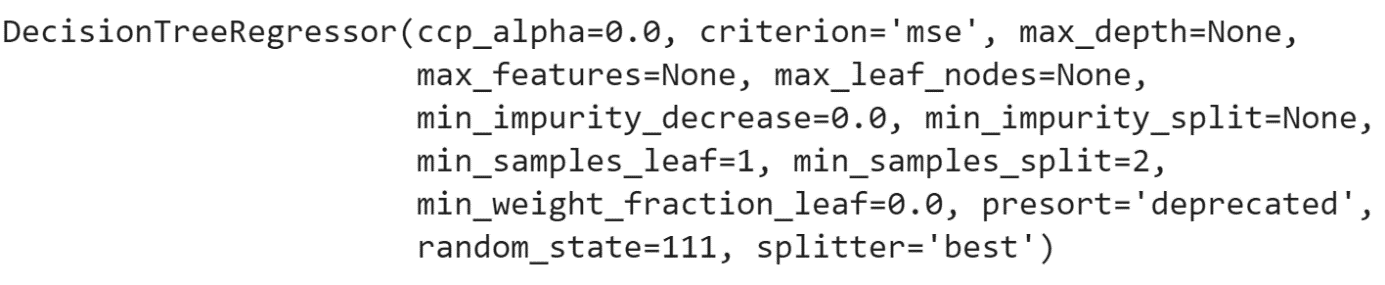

Cet algorithme a plusieurs hyperparamètres dont les plus importants et les plus utilisés sont :
criterion, max_depth, min_samples_split, min_samples_leaf et max_features. Vous pouvez
consulter la définition de ces hyperparamètres sur cette page de [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [6]:
# Prédictions
y_pred = dt.predict(X_test)

# Calcul de l'erreur quadratique moyenne
mse_dt = mse(y_test, y_pred)
print(mse_dt)

2013265454.4273973


Avec la méthode de recherche aléatoire, nous essayerons de trouver un meilleur modèle.
Autrement dit, nous cherchons un modèle dont l’erreur quadratique moyenne sera inférieure à
2013265454,4273973.  

La méthode *Random Search* n’essaie pas toutes les combinaisons possibles dans la grille des hyperparamètres comme c’était le cas avec la méthode *Grid Search*. On essaie plutôt de manière
aléatoire un certain nombre de combinaisons. Plusieurs études sur cette méthode ont montré qu’avec relativement peu d’essais, il est probable (probabilité relativement élevée) de se
rapprocher du meilleur score. L’implémentation de cette méthode dans Python se fait avec le module [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In [7]:
# Dictionnaire des hyperparamètres
param_dists = {'criterion':['mse', 'friedman_mse', 'mae'],
              'splitter':['best', 'random'],
              'max_depth':[3,5,7,None],
              'min_samples_split':np.arange(0.1, 1.1, 0.1),
              'min_samples_leaf':list(range(1,21)),
              'max_features':['auto', 'sqrt', 'log2', None]
               }

# Estimateur (objet RandomizedSearchCV)
model = RandomizedSearchCV(
    estimator = DecisionTreeRegressor(random_state = seed),
    param_distributions = param_dists,
    n_iter = 200,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    random_state = seed
    )

En spécifiant n_iter = 200, cela veut dire que nous voulons essayer de manière aléatoire 200
combinaisons. Comme score, nous avons spécifié l’erreur quadratique moyenne
(rigoureusement l’opposé de l’erreur quadratique moyenne).

In [9]:
# Démarrage de la recherche
model.fit(X, y)

# Les 5 Meilleurs hyperparamètres avec leurs scores
results = pd.DataFrame(model.cv_results_)

best = results.loc[:, ['params','mean_test_score']].sort_values('mean_test_score', ascending = False).head()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
760 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
340 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [10]:
best

,params,mean_test_score
114,"{'splitter': 'best', 'min_samples_split': 0.1,...",-1.843579e+09
188,"{'splitter': 'random', 'min_samples_split': 0....",-2.355687e+09
70,"{'splitter': 'best', 'min_samples_split': 0.1,...",-2.369973e+09
166,"{'splitter': 'best', 'min_samples_split': 0.1,...",-2.517087e+09
158,"{'splitter': 'best', 'min_samples_split': 0.5,...",-2.737802e+09


Le signe « - » ne doit en aucun cas nous tromper ici (Faites comme s’il n’était pas là). On
cherche bel et bien la plus petite valeur absolue de mean_test_score.

In [11]:
# Meilleur hyperparamétrage
best['params'].iloc[0]


{'splitter': 'best',
 'min_samples_split': 0.1,
 'min_samples_leaf': 13,
 'max_features': None,
 'max_depth': 7,
 'criterion': 'friedman_mse'}

In [12]:
# Comparaison entre le meilleur score trouvé et mse_dt
np.abs(best['mean_test_score'].iloc[0]) < mse_dt

True

La recherche du meilleur hyperparamétrage a permis de trouver un modèle qui est de loin
meilleur à celui construit avec les hyperparamètres par défaut.

In [13]:
mse_dt - np.abs(best['mean_test_score'].iloc[0])

169686538.74494743

## CONCLUSION
L’implémentation de la recherche aléatoire pour améliorer la qualité d’un modèle est très
simple. Etant donné, que c’est l’utilisateur lui-même qui définit le nombre de combinaisons
aléatoires à essayer (paramètre n_iter), Il est possible d'étendre la plage de votre recherche
d'hyperparamètres au-delà de ce qui serait pratique avec une recherche de grille. Par ailleurs,
lorsque vous avez un grand volume de données et un algorithme avec beaucoup
d’hyperparamètres, il est conseillé d’utiliser une recherche aléatoire à cause des temps de calcul
à moins que vous disposiez d’un ordinateur hyper puissant Dans ce cas, vous pouvez
toujours essayer la méthode Grid Search.